In [1]:
# Building a RAG system with LangChain 

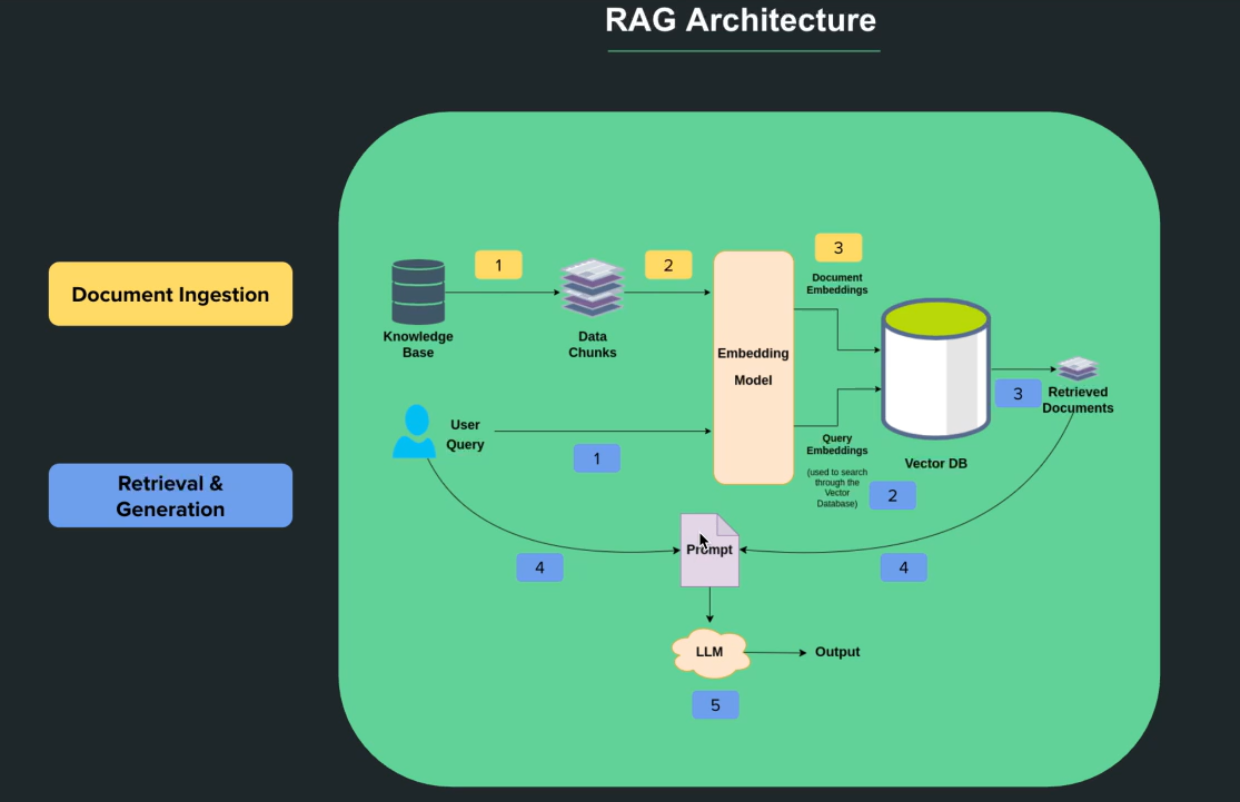

In [2]:
import warnings
import logging

warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.ERROR)


**Document Ingestion**

In [3]:
# Importing the Dependencies

from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

print("All core imports working ")


All core imports working 


In [4]:
# Configuration

docs_dir_path = "docs_dir"
vector_db_path = "vector_db"
collection_name = "document_collection"

In [5]:
# Initialize ALL components

# 1️⃣ Load documents (source of text)
loader = DirectoryLoader(
    path=docs_dir_path,
    glob="*.pdf",
    loader_cls=PyPDFLoader
)

# 2️⃣ Split long text into chunks
text_splitter = CharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=500
)

# 3️⃣ Convert text chunks into embeddings
embedding = HuggingFaceEmbeddings()

In [6]:
import shutil
import os 

# Delete old DB (VERY IMPORTANT)
if os.path.exists(vector_db_path):
    shutil.rmtree(vector_db_path)

In [7]:
# Execute ingestion pipeline

# Load documents
documents = loader.load()

# Split documents into chunks
text_chunks = text_splitter.split_documents(documents)

# Store embeddings in Chroma vector DB
vector_store = Chroma.from_documents(
    documents=text_chunks,
    embedding=embedding,
    persist_directory=vector_db_path,
    collection_name=collection_name
)

print("Document ingestion completed successfully")
print(f"Documents loaded: {len(documents)}")
print(f"Text chunks created: {len(text_chunks)}")
print(f"Vector database stored at: {vector_db_path}")


Document ingestion completed successfully
Documents loaded: 43
Text chunks created: 40
Vector database stored at: vector_db
